In [15]:
import matplotlib.pyplot as plt
from collections import Counter

import pandas as pd

import emoji
from confusable_homoglyphs import confusables

In [6]:
df = pd.read_csv('dataset/datasetKaggle.csv')
df.head()
print(df.columns)


label_counts = df['label'].value_counts()

label_counts

Index(['video_id', 'title', 'channel_name', 'tanggal', 'author', 'komentar',
       'label', 'komentar_clean', 'predicted_label'],
      dtype='object')


label
0    6021
1    4209
Name: count, dtype: int64

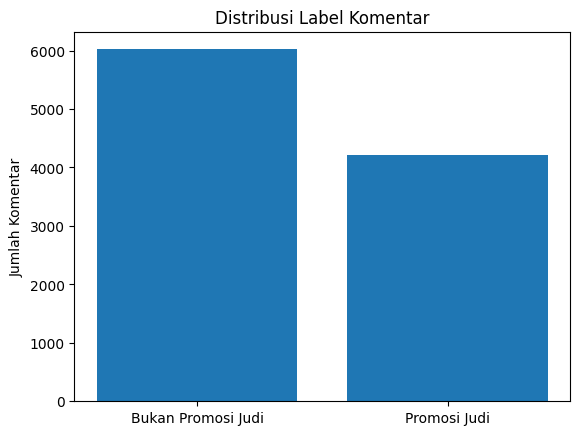

In [7]:
plt.bar(label_counts.index, label_counts.values)
plt.xticks([0, 1], ['Bukan Promosi Judi', 'Promosi Judi'])
plt.ylabel('Jumlah Komentar')
plt.title('Distribusi Label Komentar')
plt.show()

Komentar dengan label 1 (Promosi Judol)

In [12]:
df[df['label'] == 1]['komentar'].head(10)

0     Makin yakin abis baca review lain tentang ✌✌𝐒𝐆...
3                 ░𝙈𝘼𝙉𝙐𝙏88░benar2 bikin aku jadi sultan
5                      pantes tongkrongan maen alexis17
6     gua udah ga bisa bayangin hidup tanpa ALEXIS-1...
7                       langsung percaya lihat hasilnya
8            orang bilang alexis17 tuh miracle banget !
10            gue rela gak upgrade hp nabung alexis17 .
15    pikir , kelewat mikir sampe lupa pu lau tujuh ...
18                                          ❤ 𝗪𝗘𝗧𝗢𝗡𝟴𝟴 ❤
23    Busett cerahh banget 🚩𝐒𝐆𝐈𝟖𝟖🚩 encess sama koiny...
Name: komentar, dtype: object

Komentar dengan label 0 (Komen Organik)

In [9]:
df[df['label'] == 0]['komentar'].sample(10)

6446                          Kapan wapres ini dipecat ,?
2555                Mobil Subaru emang Keren,my Fav bgt👍👍
5188    Mending ga usah di undang daripada kita yang m...
3525                                salfok sama filanonya
3563                          Joget saja pak... Joget....
6005      Baru kali ini dengerin dialog bisa capek banget
811     Kan emang anggaran perbaikan jalan 0 rupiah di...
1455                                      ahok batak haha
5480        Sobatnya Ahok Si Aguan Jgn Lupa Diundang Juga
2238             woi woi apenihh .. akhirnya yg di tunggu
Name: komentar, dtype: object

In [21]:
teks_judi = ' '.join(
    df[df['label'] == 1]['komentar'].astype(str).str.lower()
)
kata_judi = Counter(teks_judi.split())
kata_judi.most_common(50)


[(',', 1705),
 ('alexis17', 979),
 ('.', 924),
 ('!', 891),
 ('gue', 524),
 ('gak', 482),
 ('main', 481),
 ('udah', 432),
 ('banget', 431),
 ('di', 389),
 ('emang', 343),
 ('sih', 318),
 ('bikin', 296),
 ('𝘼𝙇𝙀𝙓𝙄𝙎17', 277),
 ('jepe', 228),
 ('?', 220),
 ('tuh', 198),
 ('rezeki', 192),
 ('𝐒𝐆𝐈𝟖𝟖', 184),
 ('ga', 182),
 ('𝗪𝗘𝗧𝗢𝗡𝟴𝟴', 171),
 ('mandalika77', 167),
 ('maen', 156),
 ('modal', 154),
 ('tujuh', 151),
 ('gampang', 138),
 ('menang', 137),
 ('kalo', 137),
 ('coba', 130),
 ('salam', 130),
 ('gacir', 127),
 ('bang', 126),
 ('aja', 126),
 ('7', 125),
 ('bener-bener', 124),
 ('cuan', 121),
 ('wede', 119),
 ('langsung', 117),
 ('yang', 113),
 ('keren', 113),
 ('orang', 112),
 ('bilang', 105),
 ('nih', 105),
 ('hidup', 104),
 ('bro', 104),
 ('join', 104),
 ('l', 102),
 ('dari', 100),
 ('auto', 100),
 ('gw', 99)]

Pada dataset ini, cukup banyak tanda baca yang tidak dihilangkanm.  

Menyebut nama situs yabg dipromosikan : alexis17, 𝐒𝐆𝐈𝟖𝟖, 𝗪𝗘𝗧𝗢𝗡𝟴𝟴  

Pengunaan istilah yang berkaitan dengan Judi/Judol : Main, modal, jepe/jp/jackpot, gacor dll.


Penggunaan Emoji Pada komentar Promosi Judol

In [13]:
df_judi = df[df['label'] == 1].copy()

def ada_emoji(teks):
    return any(ch in emoji.EMOJI_DATA for ch in str(teks))

df_judi['ada_emoji'] = df_judi['komentar'].apply(ada_emoji)
df_judi['ada_emoji'].value_counts(normalize=True)
from collections import Counter

emoji_judi = []

for teks in df_judi['komentar'].astype(str):
    emoji_judi.extend([c for c in teks if c in emoji.EMOJI_DATA])

Counter(emoji_judi).most_common(10)


[('⭐', 267),
 ('⚡', 116),
 ('🔥', 71),
 ('☯', 33),
 ('❤', 32),
 ('🅰', 28),
 ('🚩', 26),
 ('💞', 24),
 ('✌', 12),
 ('🎉', 10)]

Penggunaan Karakter unicoe aneh

In [22]:
def ada_unicode_aneh(teks):
    return any(ord(ch) > 127 for ch in str(teks))

def ambil_karakter_aneh(teks):
    return list({ch for ch in str(teks) if ord(ch) > 127})

df_judi['ada_unicode_aneh'] = df_judi['komentar'].apply(ada_unicode_aneh)
df_judi['ada_unicode_aneh'].value_counts(normalize=True)
df_judi['karakter_aneh'] = df_judi['komentar'].apply(ambil_karakter_aneh)
df_judi[df_judi['karakter_aneh'].astype(bool)][['komentar', 'karakter_aneh']].sample(10)


,komentar,karakter_aneh
565,"Salam ⭐𝐒𝐆𝐈𝟖𝟖! gampang Jepe ,Sehat selalu buat ...","[𝐈, ⭐, 𝐆, 𝐒, 𝟖]"
7607,Rezeki dari D 𝘖 Я 𝘼 𝟳 𝟳-bikin hariku lebih ber...,"[Я, 🤼, 𝟳, 𝘼, 𝘖]"
2255,"gak gagal , 𝗦𝗚𝗜𝟴𝟴","[𝟴, 𝗚, 𝗦, 𝗜]"
4359,"anjay , rame banget nih 𝘼𝙇𝙀𝙓𝙄𝙎17 tongkrongan .","[𝙀, 𝙇, 𝘼, 𝙎, 𝙓, 𝙄]"
7765,𝐏𝐋𝐔𝐓𝐎𝟖𝟖 .. terpopuler masakini,"[𝐔, 𝐓, 𝐋, 𝐏, 𝐎, 𝟖]"
3092,"penasaran deh 𝘼𝙇𝙀𝙓𝙄𝙎17 , kayaknya seru . .","[𝙀, 𝙇, 𝘼, 𝙎, 𝙓, 𝙄]"
6932,! bang video ! ! 𝐒𝐆𝐈𝟖𝟖 terpercaya 5k 1jt,"[𝐈, 𝐆, 𝐒, 𝟖]"
6075,! bang video ! ! 𝐒𝐆𝐈𝟖𝟖 terpercaya 5k 1jt,"[𝐈, 𝐆, 𝐒, 𝟖]"
6339,"bro 𝘼𝙇𝙀𝙓𝙄𝙎17 turnamen gede nih , hadiahnya mil...","[𝙀, 𝙇, 𝘼, 𝙎, 𝙓, 𝙄]"
6588,"mantap jiwa raga main 𝘼x𝘓 7𝟩𝟽 , cuan menerus j...","[𝟩, 𝟽, 𝘼, 𝘓]"


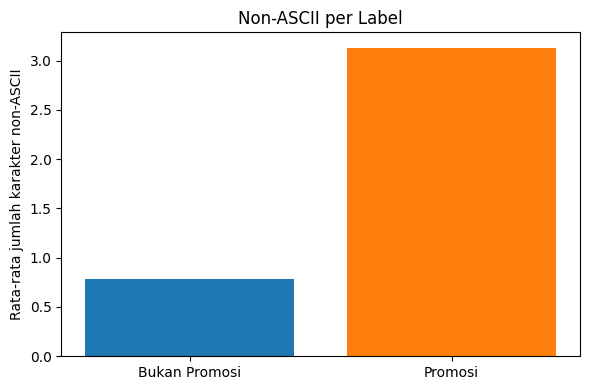

In [20]:

df['non_ascii_count'] = df['komentar'].astype(str).apply(lambda s: sum(ord(ch)>127 for ch in s))
means = df.groupby('label')['non_ascii_count'].mean()
plt.figure(figsize=(6,4))
plt.bar(['Bukan Promosi','Promosi'], means.values, color=['tab:blue','tab:orange'])
plt.ylabel('Rata-rata jumlah karakter non-ASCII')
plt.title('Non-ASCII per Label')
plt.tight_layout()
plt.show()

# EDA
Notebook ini melakukan eksplorasi awal terhadap komentar YouTube bertanda label promosi judi atau bukan.

Langkah-langkah utama:
- Menampilkan contoh komentar untuk kedua label guna pemahaman konteks.
- Mengidentifikasi kata yang sering muncul pada komentar berlabel judi (frekuensi kata).
- Mengecek keberadaan emoji pada komentar judi serta daftar emoji yang paling sering muncul.
- Mengevaluasi karakter Unicode non-ASCII/aneh untuk mengidentifikasi obfuscation atau penyamaran teks.

Tujuan EDA: memahami pola, potensi fitur (emoji/karakter unik), serta isu kualitas data (unicode confusables) untuk membantu preprocessing dan pemodelan.

# Analisis Temuan
- Emoji pada komentar judi: Proporsi komentar berjudi dengan emoji dan daftar emoji terbanyak menunjukkan bahwa emoji bisa menjadi fitur berguna (contoh: simbol uang, permainan).
- Karakter Unicode aneh: Kehadiran karakter non‑ASCII menunjukkan potensi obfuscation (misal huruf mirip Latin). Hal ini mendukung kebutuhan normalisasi unicode dan penghilangan combining marks sebelum tokenisasi.  
- Pada data ini banyak tanda baca yng terb

Implikasi untuk preprocessing dan modeling:
- Lakukan normalisasi unicode untuk mengurangi penyamaran teks.
- Hapus combining marks dan tanda baca agar token konsisten.